## Sales Prediction using Artificial Neural Network
### Problem Statement
- You are opening a new Store at a particular location. Now, Given the Store Location, Area, Size and other params. Predict the overall revenue/Sale generation of the Store.
- The aim is to build a predictive model and predict the sales of each product at a particular outlet. Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.


### Data Description
- Big Mart has collected sales data from the year 2013, for 1559 products across 10 stores in different cities. Where the dataset consists of 12 attributes like Item Fat, Item Type, Item MRP, Outlet Type, Item Visibility, Item Weight, Outlet Identifier, Outlet Size, Outlet Establishment Year, Outlet Location Type, Item Identifier and Item Outlet Sales. Out of these attributes response variable is the Item Outlet Sales attribute and remaining attributes are used as the predictor variables.
- The data-set is also based on hypotheses of store level and product level. Where store level involves attributes like:- city, population density, store capacity, location, etc and the product level hypotheses involves attributes like:- brand, advertisement, promotional offer, etc.

### Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv("train_v9rqX0R.csv")

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
data.shape

(8523, 12)

In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### There are lot of null values so we cannot drop null values instead we will use null value handling methods
- Mean -> Average Value
- Mode -> Most Repeated Value

In [7]:
# mean of item weight
data["Item_Weight"].mean()

12.857645184135976

In [8]:
# Filling item weight with mean value of item weight
data["Item_Weight"].fillna(data["Item_Weight"].mean(), inplace = True)

In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
data["Outlet_Size"] = data["Outlet_Size"].fillna("Small")

In [11]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Data Visualization for Numerical Features 

In [13]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']

In [14]:
numeric_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

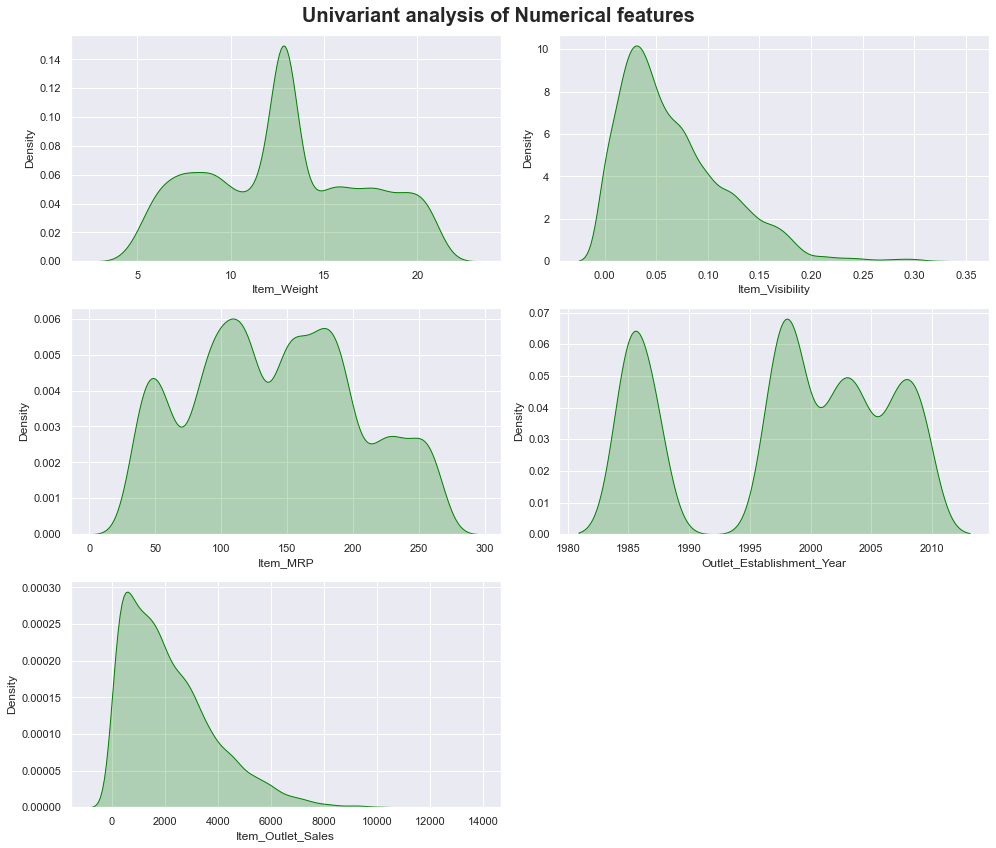

In [15]:
plt.figure(figsize = (14, 12))
sns.set(rc = {'figure.figsize':(8,10)})
plt.suptitle('Univariant analysis of Numerical features', fontsize = 20, fontweight = 'bold')

for i in range(0, len(numeric_features)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x = data[numeric_features[i]], shade = True, color = 'green')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Data Visualization for Categorical Features 

### Types Of Items

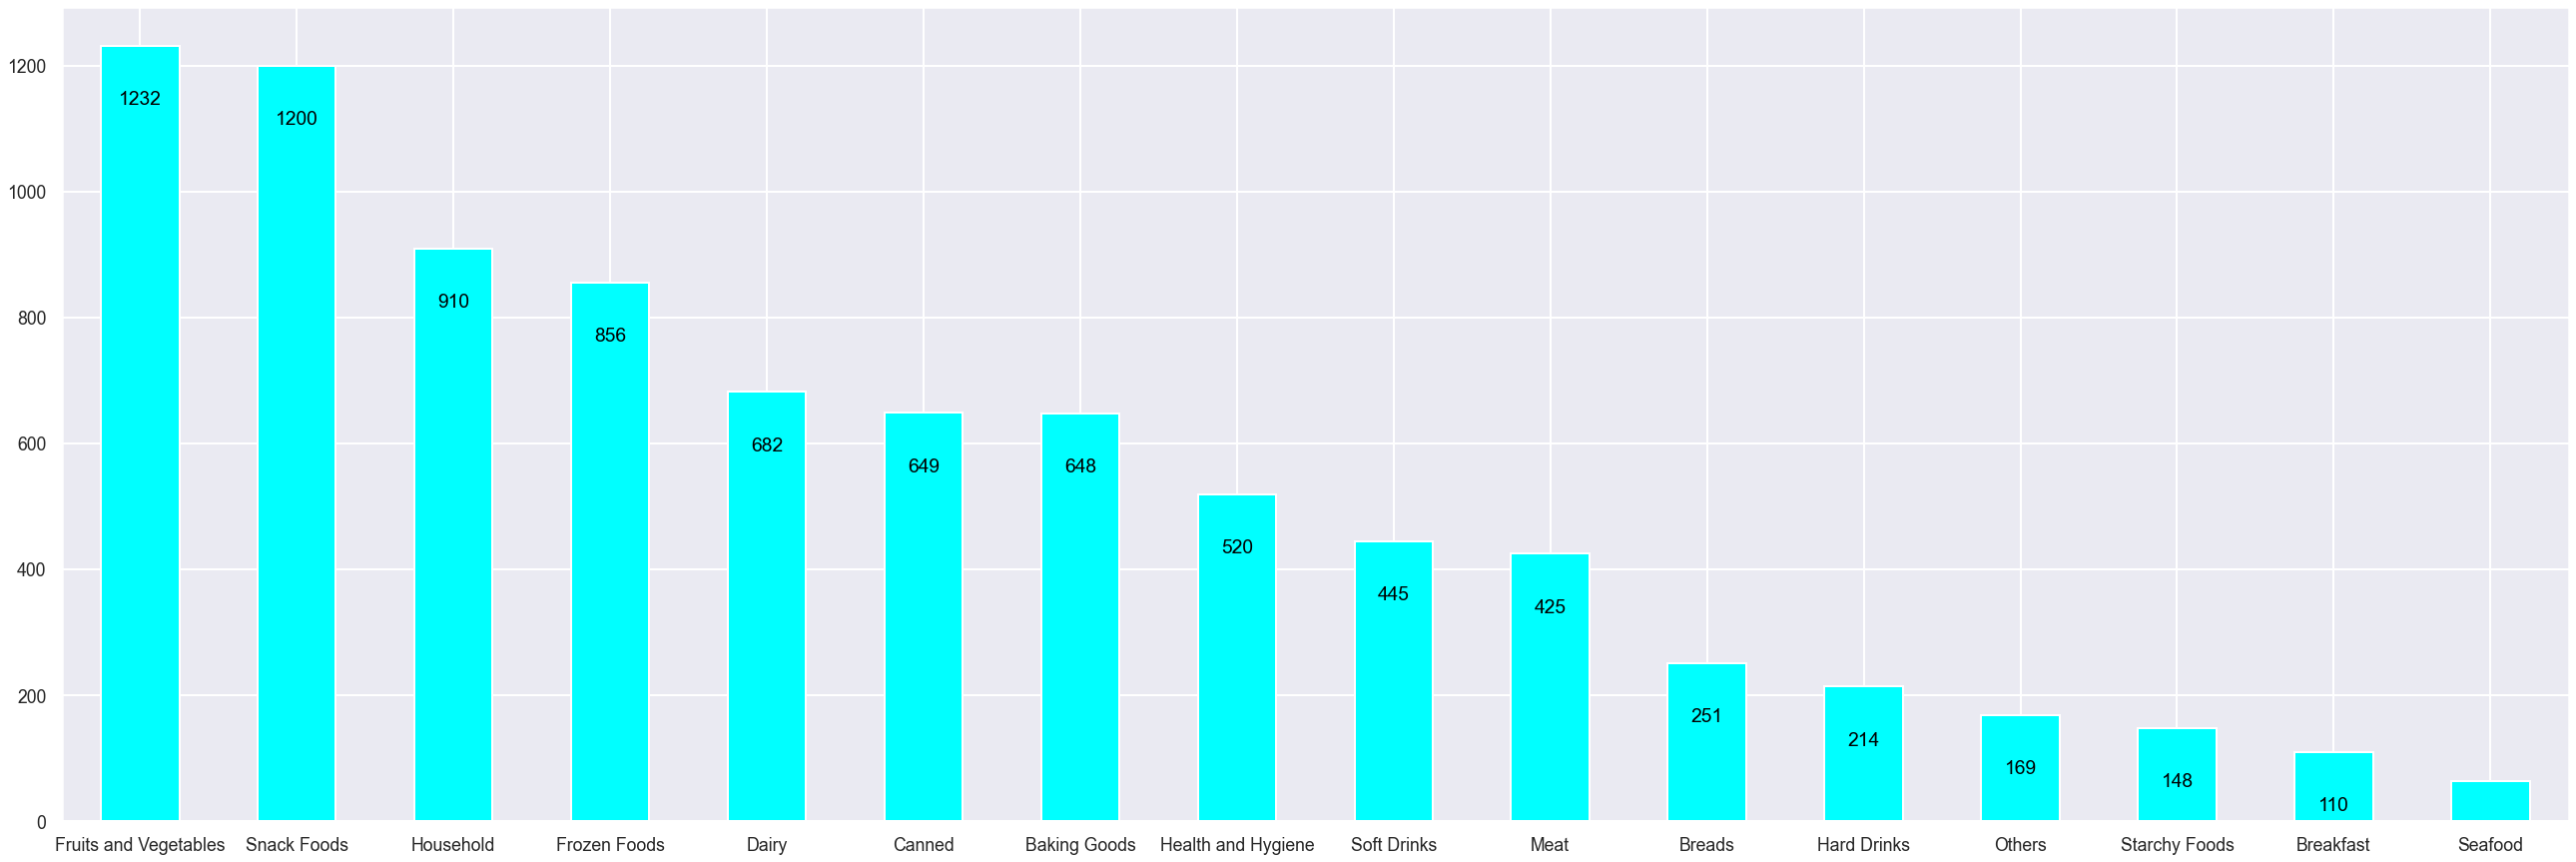

In [16]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (45, 15))
ax = data["Item_Type"].value_counts().plot(kind = 'bar',
                                         color = "Aqua",
                                         rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100),
                ha = 'center',
                va = 'bottom',
                color = 'Black') 

### Outlet Codes

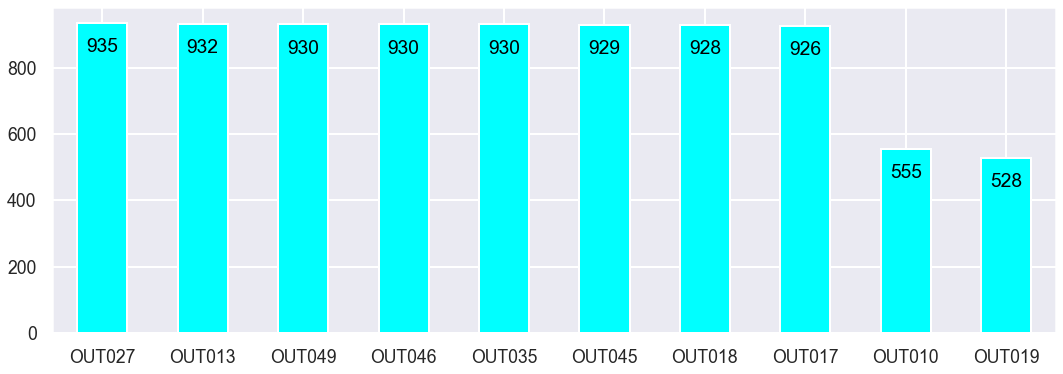

In [17]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (18, 6))
ax = data["Outlet_Identifier"].value_counts().plot(kind = 'bar',
                                         color = "Aqua",
                                         rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100),
                ha = 'center',
                va = 'bottom',
                color = 'Black') 

### Outlet Establishment Year

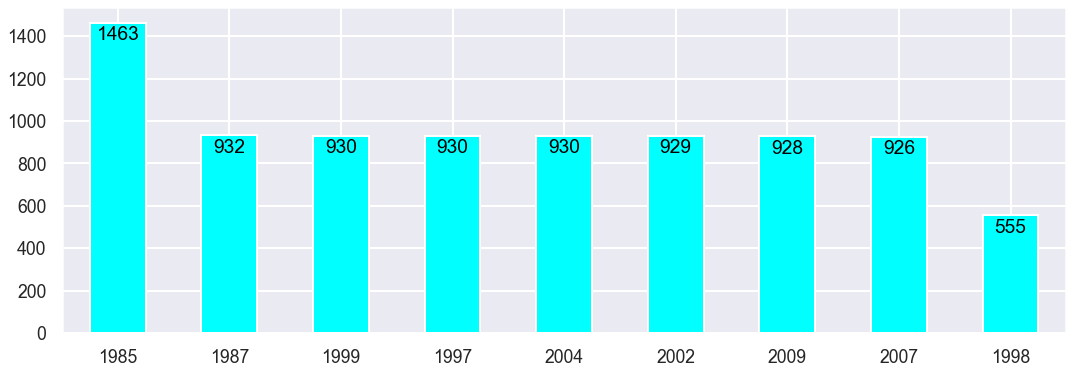

In [18]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (18, 6))
ax = data["Outlet_Establishment_Year"].value_counts().plot(kind = 'bar',
                                         color = "Aqua",
                                         rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100),
                ha = 'center',
                va = 'bottom',
                color = 'Black') 

### Outlet Size

Text(0.5, 1.0, 'Outlet Size')

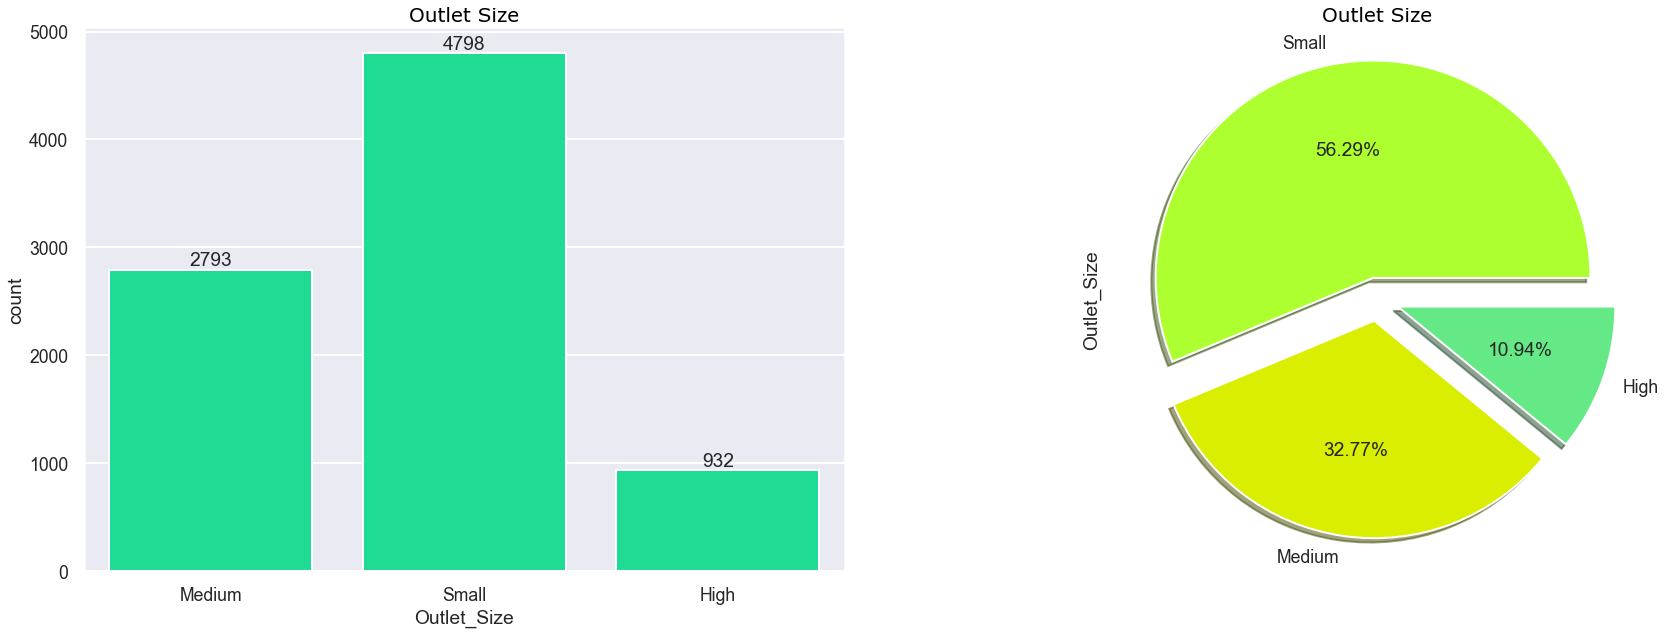

In [19]:
ax = plt.figure(figsize=(30, 10))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Outlet_Size', data=data, color = "#00FA9A")
ax.bar_label(ax.containers[0])
plt.title("Outlet Size", fontsize=20,color='Black',font='Verdana')
ax =plt.subplot(1,2,2)
ax=data['Outlet_Size'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],colors = ['#ADFF2F', '#DAEE01', '#64E986'], autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Outlet Size", fontsize = 20,color='Black',font='Verdana')

### Outlet Location Types

Text(0.5, 1.0, 'Outlet Location')

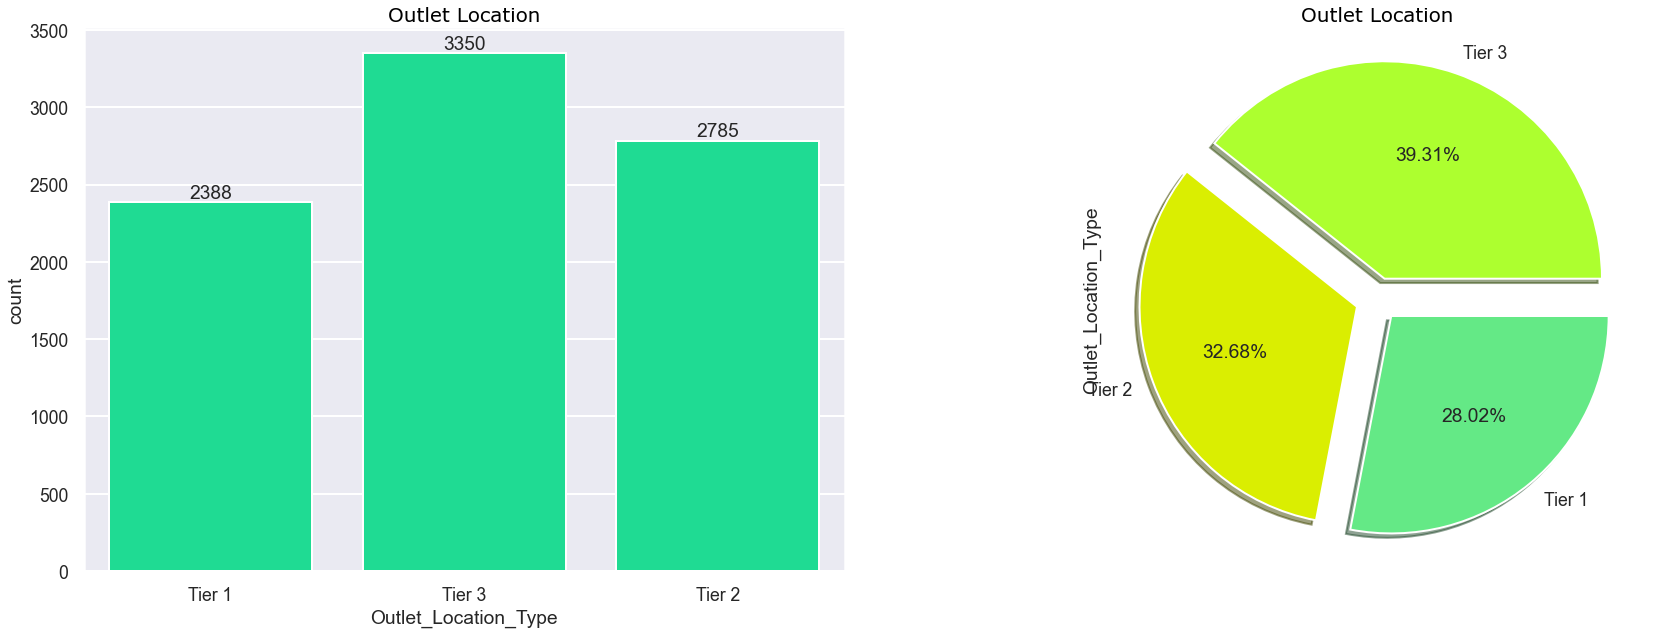

In [20]:
ax = plt.figure(figsize=(30, 10))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Outlet_Location_Type', data=data, color = "#00FA9A")
ax.bar_label(ax.containers[0])
plt.title("Outlet Location", fontsize=20,color='Black',font='Verdana')
ax =plt.subplot(1,2,2)
ax=data['Outlet_Location_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],colors = ['#ADFF2F', '#DAEE01', '#64E986'], autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Outlet Location", fontsize = 20,color='Black',font='Verdana')

### Outlet Types

Text(0.5, 1.0, 'Outlet_Type')

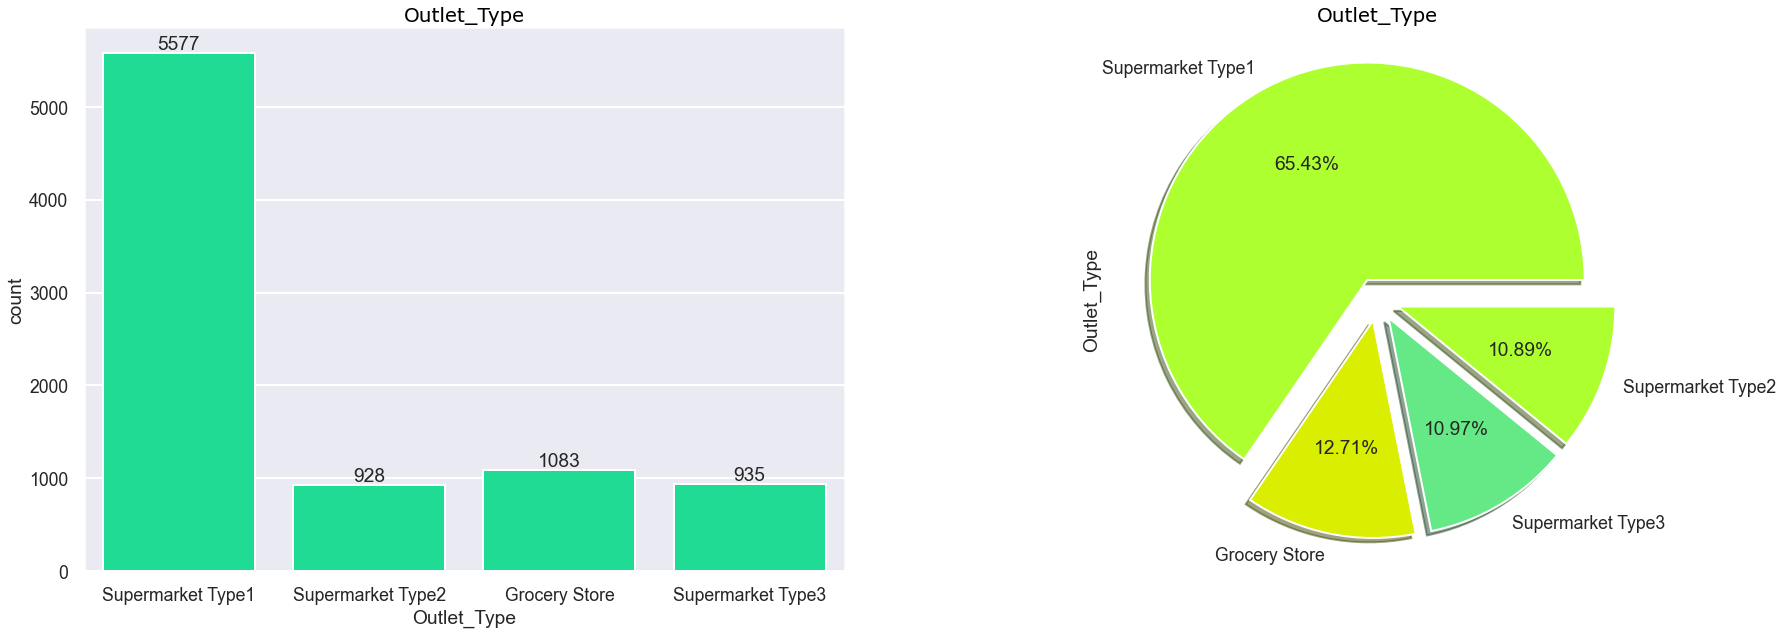

In [21]:
ax = plt.figure(figsize=(30, 10))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Outlet_Type', data=data, color = "#00FA9A")
ax.bar_label(ax.containers[0])
plt.title("Outlet_Type", fontsize=20,color='Black',font='Verdana')
ax =plt.subplot(1,2,2)
ax=data['Outlet_Type'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1],colors = ['#ADFF2F', '#DAEE01', '#64E986'], autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Outlet_Type", fontsize = 20,color='Black',font='Verdana')

In [22]:
data.replace({"Item_Fat_Content" : {"low fat" : "Low Fat", "LF" : "Low Fat", "reg":"Regular"}}, inplace = True)

Text(0.5, 1.0, 'Item_Fat_Content')

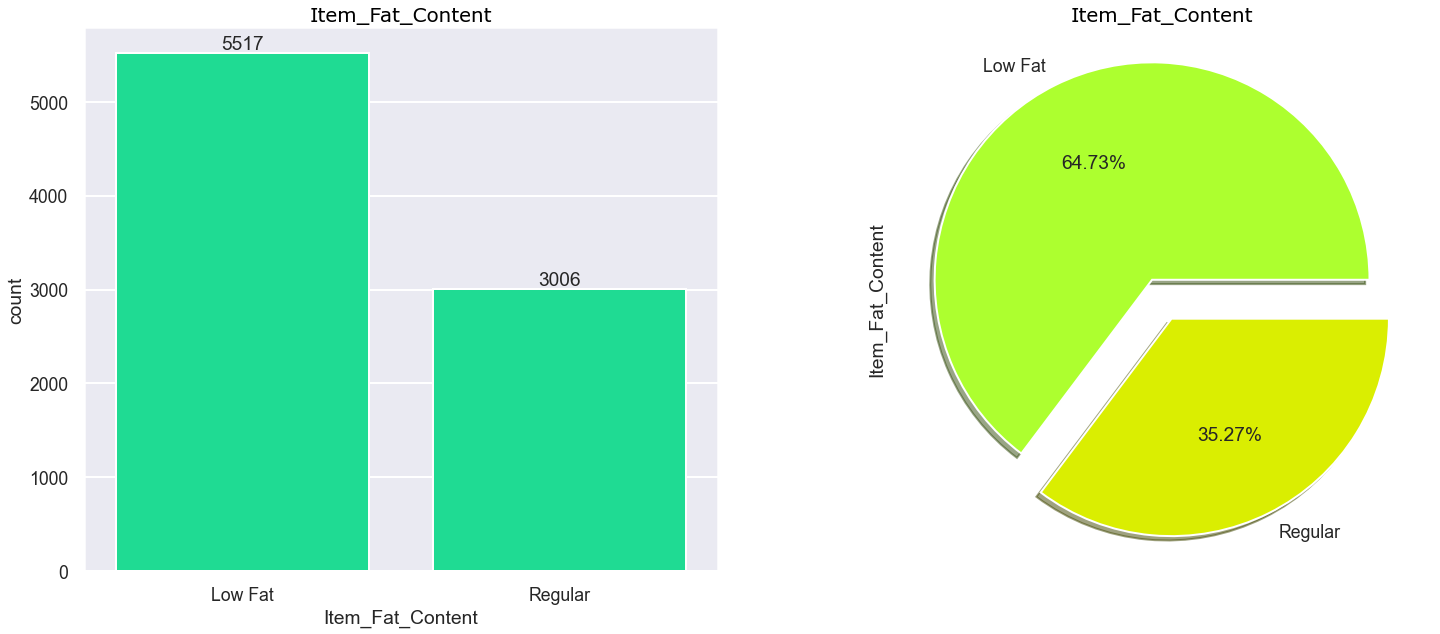

In [23]:
ax = plt.figure(figsize=(25, 10))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Item_Fat_Content', data=data, color = "#00FA9A")
ax.bar_label(ax.containers[0])
plt.title("Item_Fat_Content", fontsize=20,color='Black',font='Verdana')
ax =plt.subplot(1,2,2)
ax=data['Item_Fat_Content'].value_counts().plot.pie(explode=[0.1, 0.1],colors = ['#ADFF2F', '#DAEE01', '#64E986'], autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Item_Fat_Content", fontsize = 20,color='Black',font='Verdana')

### Heatmap

<AxesSubplot:>

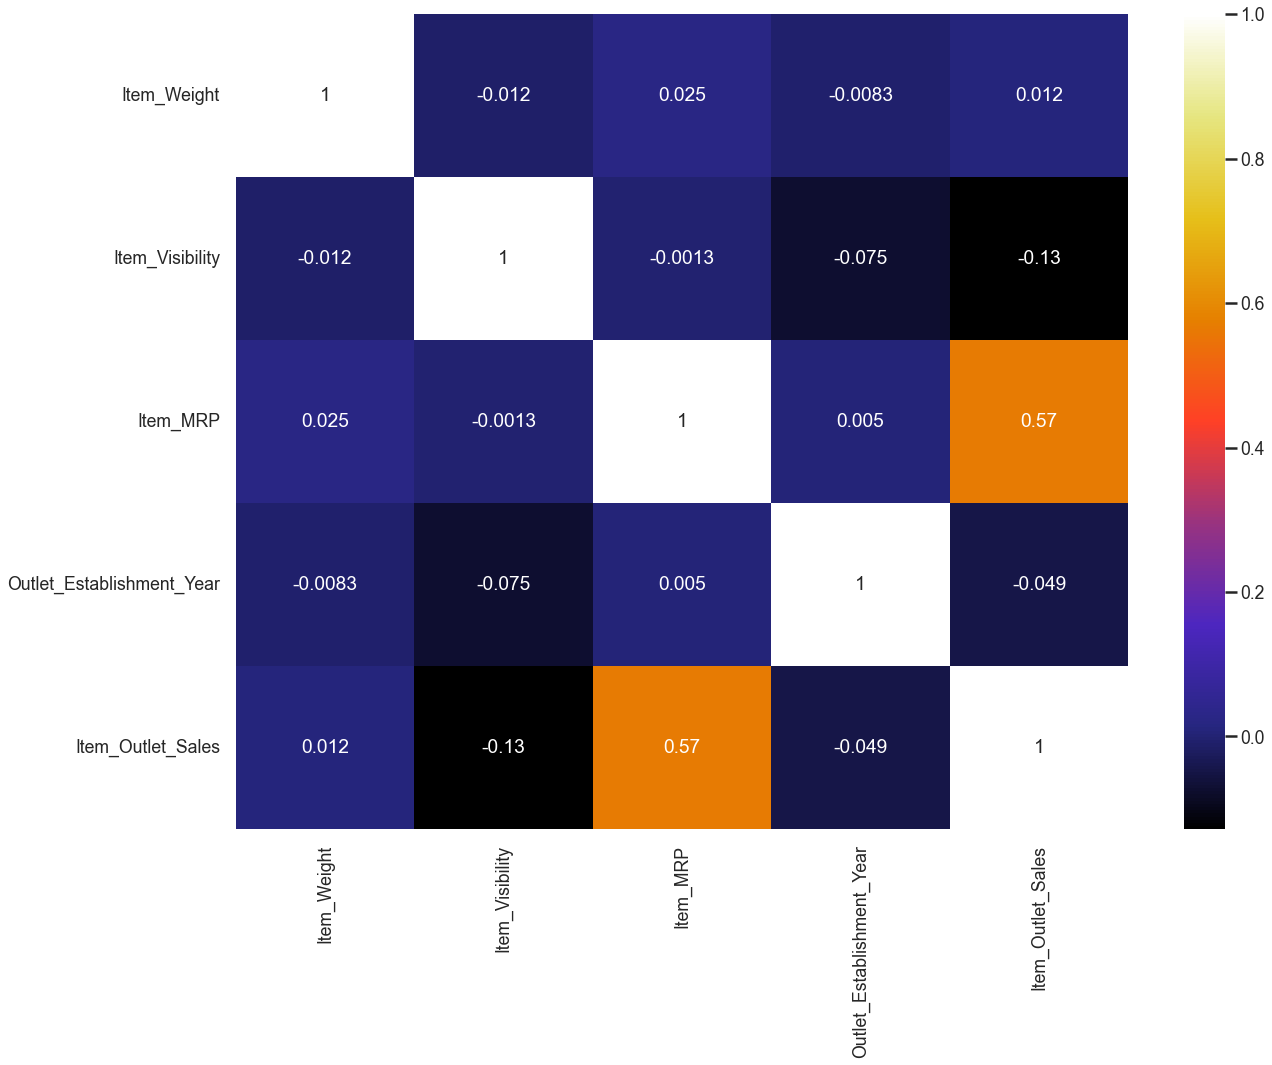

In [24]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(), cmap = 'CMRmap', annot = True)

### Outlier Treatment

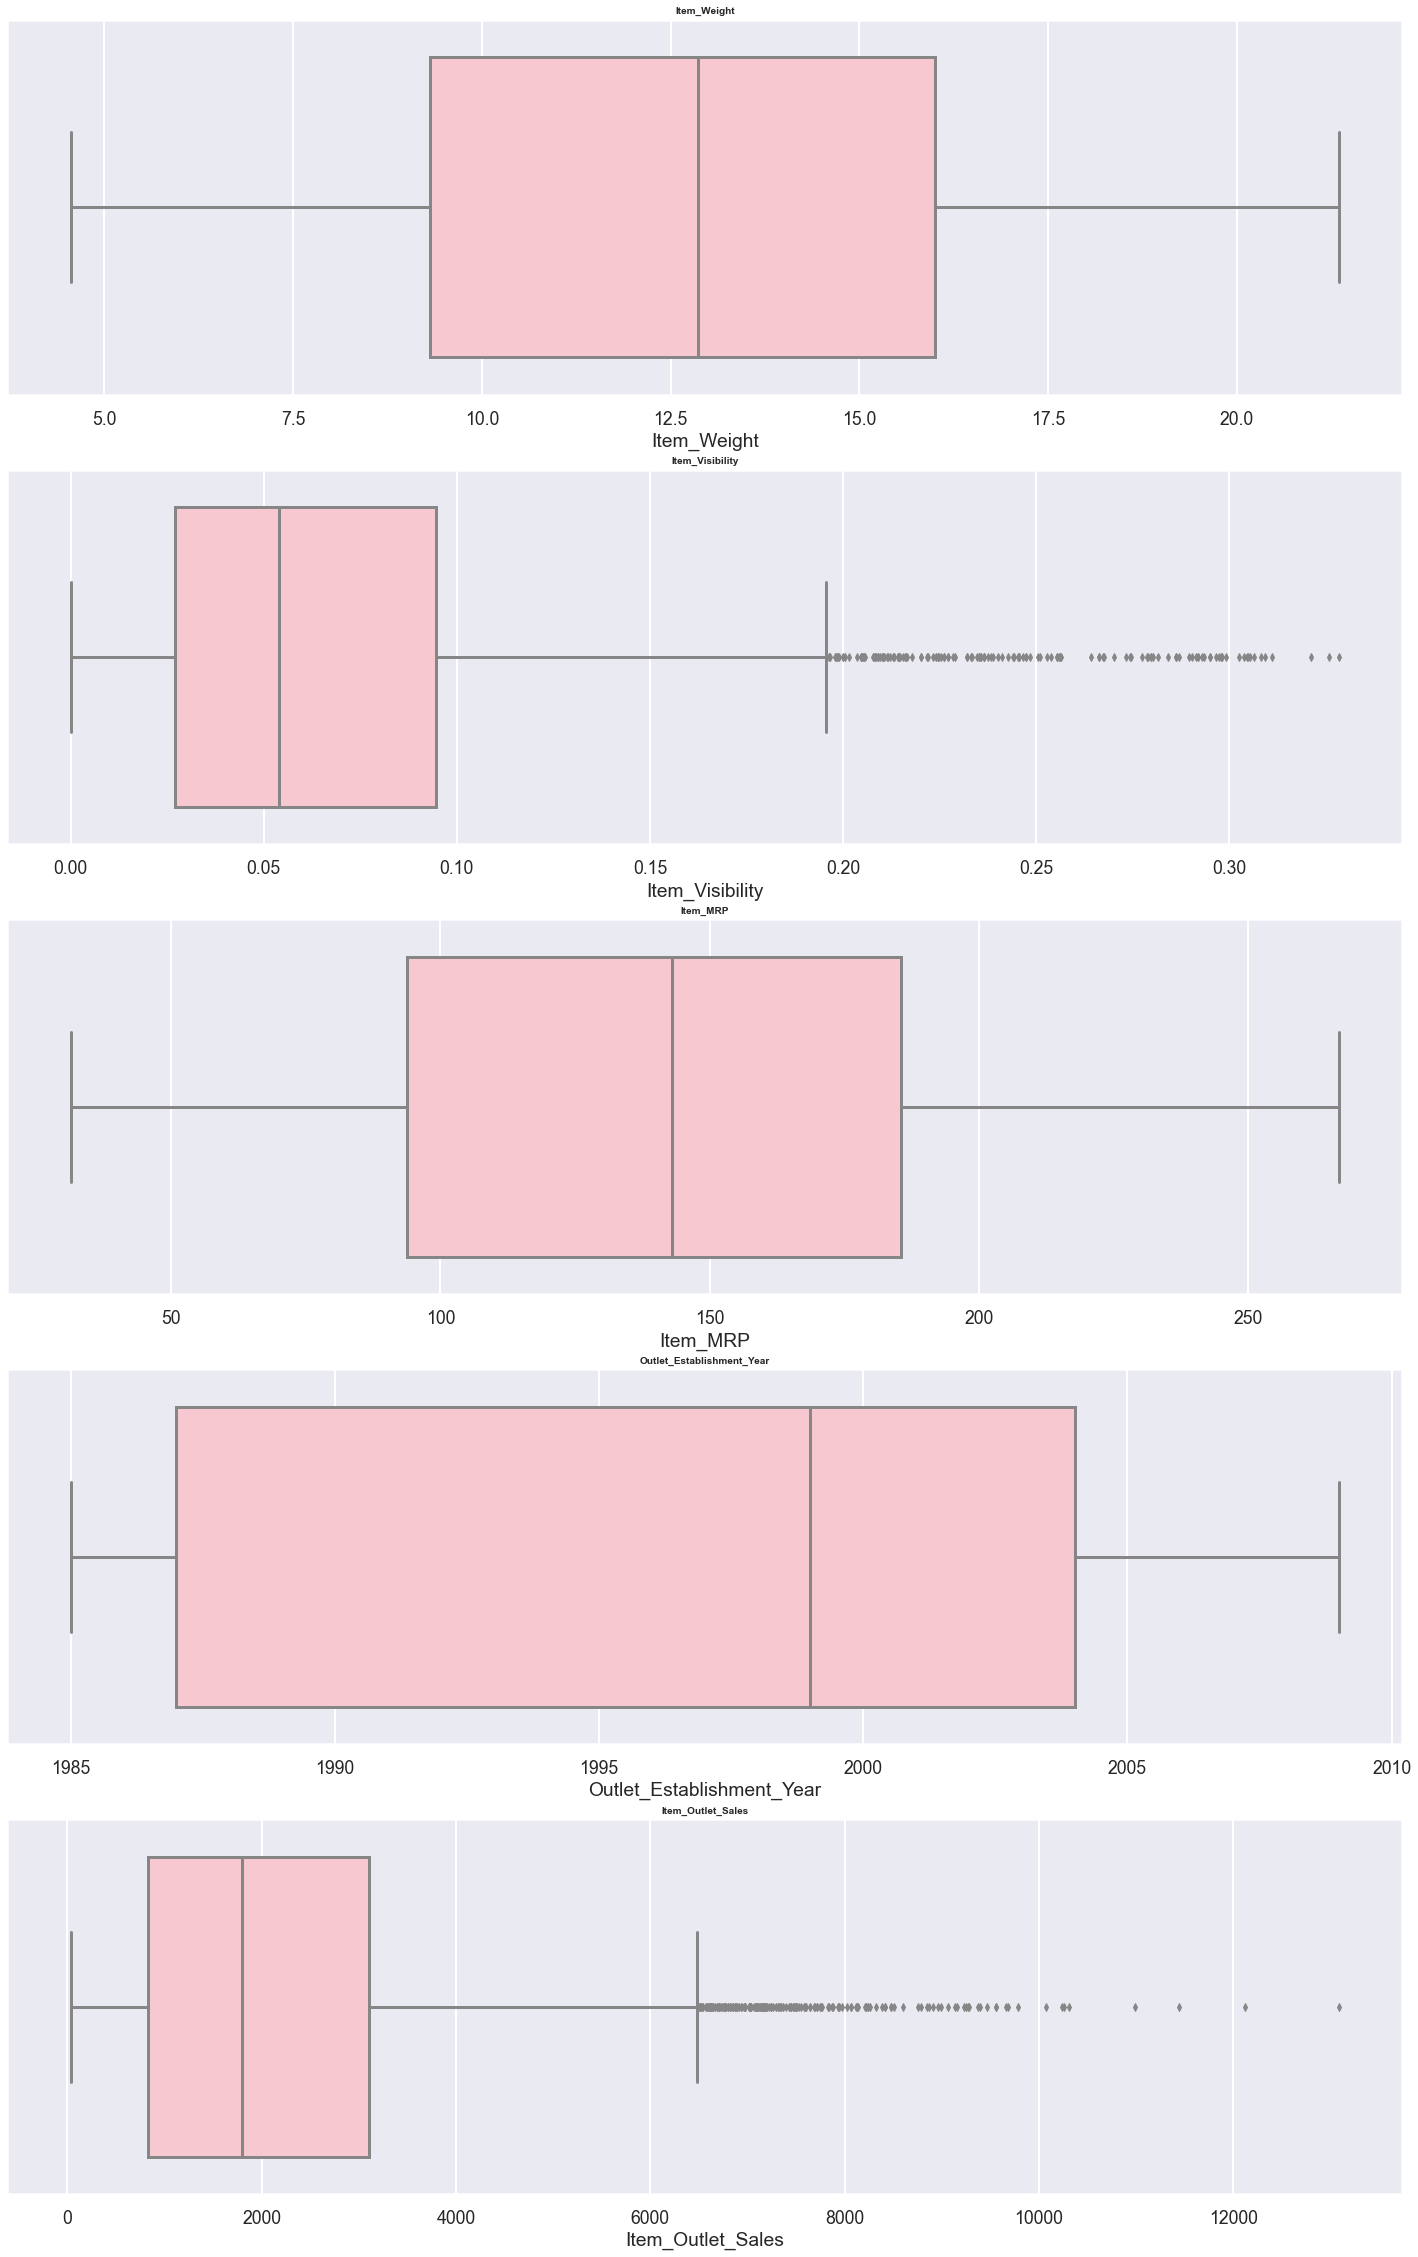

In [25]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
plt.figure(figsize = (25,40))
for feature in enumerate(numeric_features):
    plt.subplot(5,1, feature[0]+1)
    sns.boxplot(data = data, x = feature[1], color = "pink")
    plt.title("{}".format(feature[1]), fontweight = "bold", fontsize = 10)

In [26]:
# Handling Outliers
def remove_outliers(in_data, in_col):
    first_quartile = in_data[in_col].quantile(0.25)
    third_quartile = in_data[in_col].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col] = upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col] = lower_limit
    return in_data

In [27]:
for feature in numeric_features:
    data = remove_outliers(data, feature)

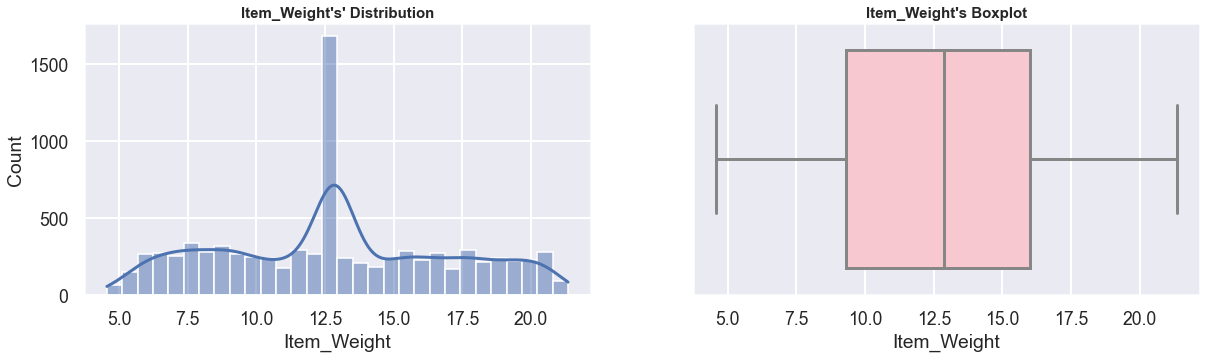

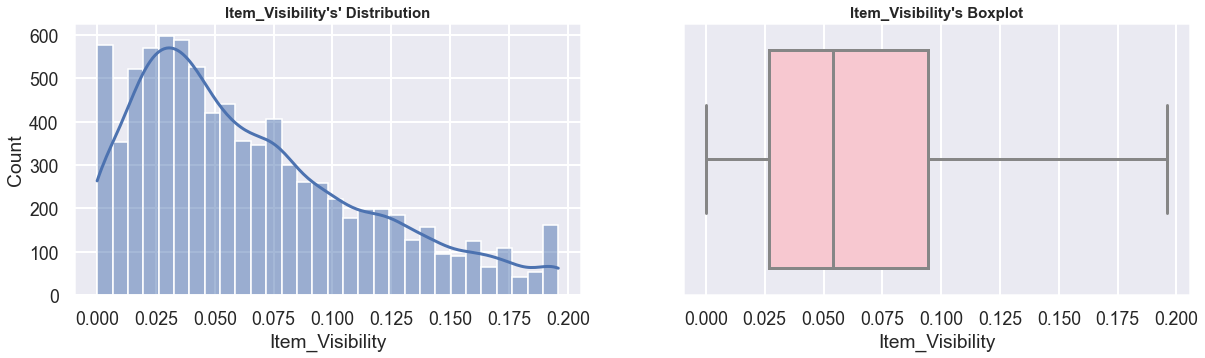

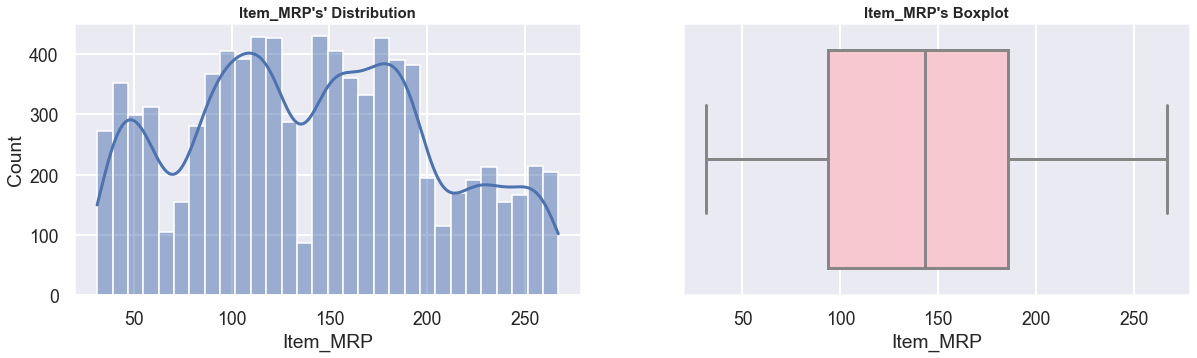

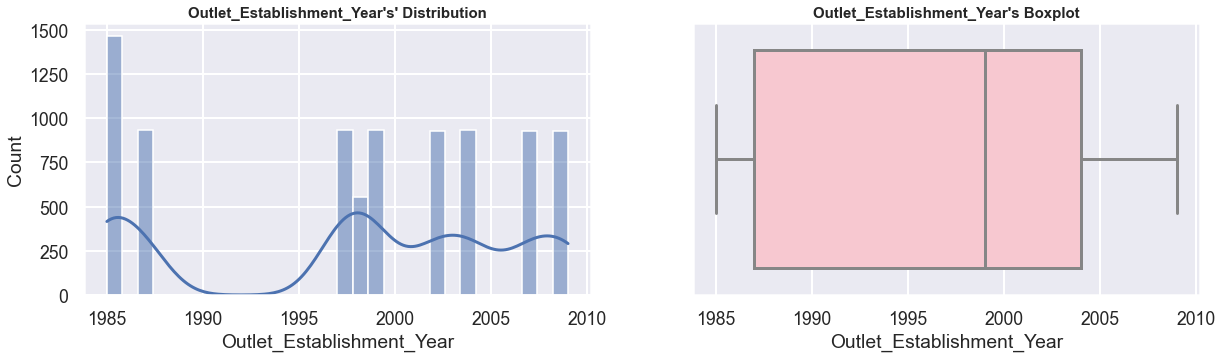

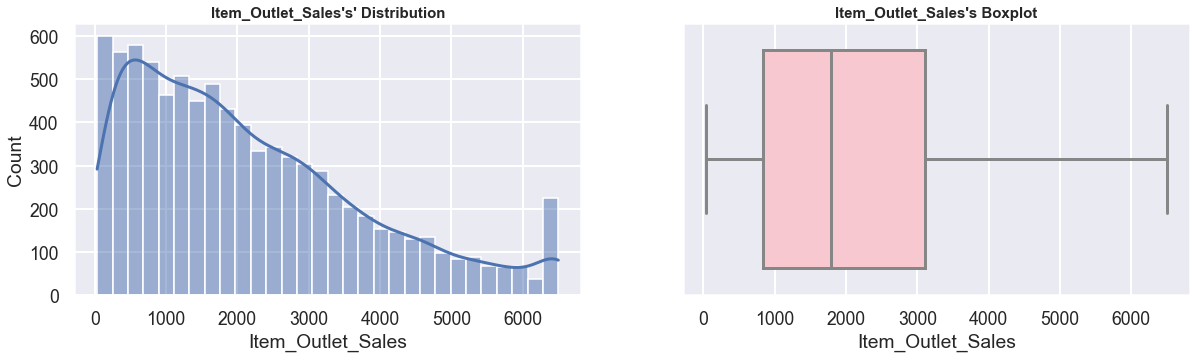

In [28]:
for feature in numeric_features:
    plt.figure(figsize = (20,5))
    plt.subplot(121)
    sns.histplot(data = data, x = feature, kde = True, bins = 30)
    plt.title("{}'s' Distribution".format(feature), fontweight = "bold", fontsize = 15)
    
    plt.subplot(122)
    sns.boxplot(data = data, x = feature, color = "pink")
    plt.title("{}'s Boxplot".format(feature),fontweight = "bold", fontsize = 15)
    plt.show

### Feature Engineering

In [29]:
encoder = LabelEncoder()

In [30]:
data["Item_Identifier"] = encoder.fit_transform(data["Item_Identifier"])
data["Item_Fat_Content"] = encoder.fit_transform(data["Item_Fat_Content"])
data["Item_Type"] = encoder.fit_transform(data["Item_Type"])
data["Outlet_Identifier"] = encoder.fit_transform(data["Outlet_Identifier"])
data["Outlet_Size"] = encoder.fit_transform(data["Outlet_Size"])
data["Outlet_Location_Type"] = encoder.fit_transform(data["Outlet_Location_Type"])
data["Outlet_Type"] = encoder.fit_transform(data["Outlet_Type"])

### Scaling Data

In [31]:
scaler = MinMaxScaler()

In [32]:
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [33]:
x = data.drop(columns = ["Item_Outlet_Sales"], axis = 1)
y = data["Item_Outlet_Sales"]

### Splitting Data for trainning and Testing

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [35]:
x_train.shape

(6818, 11)

### Model Building Artificial Nueral Network

In [36]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape = (11,), activation = "relu"),
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dense(1, activation = "linear")
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs= 50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
214/214 [==============================] - 4s 10ms/step - loss: 0.0360 - val_loss: 0.0306
Epoch 2/50
214/214 [==============================] - 2s 7ms/step - loss: 0.0263 - val_loss: 0.0255
Epoch 3/50
214/214 [==============================] - 2s 7ms/step - loss: 0.0255 - val_loss: 0.0280
Epoch 4/50
214/214 [==============================] - 2s 7ms/step - loss: 0.0253 - val_loss: 0.0252
Epoch 5/50
214/214 [==============================] - 2s 7ms/step - loss: 0.0248 - val_loss: 0.0254
Epoch 6/50
214/214 [==============================] - 2s 8ms/step - loss: 0.0248 - val_loss: 0.0308
Epoch 7/50
214/214 [==============================] - 2s 7ms/step - loss: 0.0250 - val_loss: 0.0255
Epoch 8/50
214/214 [==============================] - 2s 7ms/step - loss: 0.0247 - val_loss: 0.0250
Epoch 9/50
214/214 [==============================] - 2s 7ms/step - loss: 0.0247 - val_loss: 0.0251
Epoch 10/50
214/214 [==============================] - 2s 7ms/step - loss: 0.0248 - val_loss: 0.026

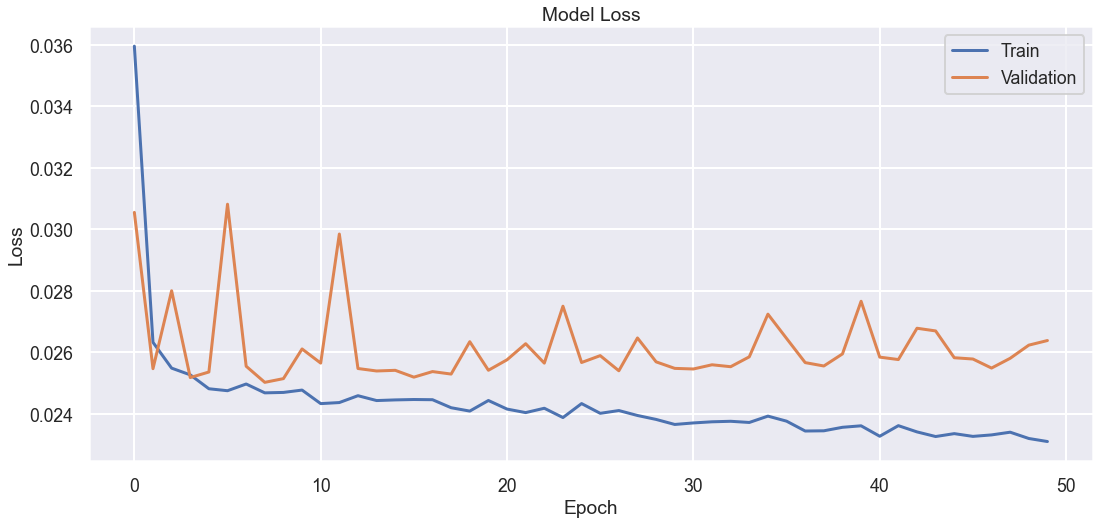

In [37]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize = (18,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Model Metrics

In [38]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [39]:
# Calculate the accuracy metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)


# Print the results
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)

Train MSE: 0.022883282275624656
Test MSE: 0.02638514608797696
Train MAE: 0.10843367417450353
Test MAE: 0.1156016075745701
